In [21]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (7.0, 10.0)

In [22]:
def parse_time(raw_time):
    '''Parse the raw time strings into timedeltas for doing arithmetic on the times'''
    if raw_time == '' or None:
        return None
    else:
        try:
            dt = datetime.datetime.strptime(str(raw_time), '%M:%S.%f')
            timedelta = datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
            return timedelta
        except:
            dt = datetime.datetime.strptime(str(raw_time), '%S.%f')
            timedelta = datetime.timedelta(seconds=dt.second, microseconds=dt.microsecond)
            return timedelta


def timedeltaToString(rawTd):
    '''Convert timedelta to a MM:SS.000 formatted string'''
    try:
        dt = str(rawTd)[-12:-3]
        return dt
    except:
        return None

In [23]:
def processResults(df):
    '''Calculate split times, time gaps and rankings for each rider'''
    #Apply the time parser to the raw times
    for i in range(1,6):
        df['split' + str(i)] = df['split' + str(i)].apply(parse_time)

    #Calculate the total sector times for each split
    df['sector1'] = df['split1']
    df['sector2'] = df['split2'] - df['split1']
    df['sector3'] = df['split3'] - df['split2']
    df['sector4'] = df['split4'] - df['split3']
    df['sector5'] = df['split5'] - df['split4']

    #Calculate the time gaps and rankings for everything
    cols = ['sector1', 'sector2', 'sector3','sector4', 'sector5', 'split1', 'split2', 'split3','split4', 'split5']

    for col in cols:
        df[col + 'Gap'] = df[col].apply(lambda x: (x - df[col].min())/np.timedelta64(1,'s'))
        df[col + 'Rank'] = df[col].rank().astype(int)
        df[col] = df[col].apply(timedeltaToString)
        df[col + 'Rank']

    return df

In [25]:
df = pd.read_excel('2016_03_FortWilliam_Men.xlsx')
df.reset_index(inplace=True)
cols = ['Index',
        'Rank', 
        'P', 
        'Bib', 
        'UCI Code', 
        'Name', 
        'speed', 
        'split1', 
        'Pos 1 & 2', 
        'split3',
        'Pos 3 & 4',
        'split5',
        'Gap',
        'Pts']

df.head()
df.columns = cols
df['split2'] = df['split1'].shift(-2)
df['split4'] = df['split3'].shift(-2)
df['Team'] = df['Name'].shift(-2)
df['split5'] = df['split5'].shift(-1)
df['speed'] = df['speed'].shift(-1)

df2 = df.iloc[::3, :][['Rank','Name','Team','split1', 'split2','split3','split4','split5']]
df2['split1'] = df2['split1'].apply(parse_time)
df2.dtypes


Rank              float64
Name               object
Team               object
split1    timedelta64[ns]
split2             object
split3             object
split4             object
split5             object
dtype: object

In [68]:
df = pd.read_excel('2016_03_FortWilliam_Men.xlsx')
df.reset_index(inplace=True)
cols = ['Index',
        'Rank', 
        'P', 
        'Bib', 
        'UCI Code', 
        'Name', 
        'speed', 
        'split1', 
        'Pos 1 & 2', 
        'split3',
        'Pos 3 & 4',
        'split5',
        'Gap',
        'Pts']
df.columns = cols
df['split2'] = df['split1'].shift(-2)
df['split4'] = df['split3'].shift(-2)
df['Team'] = df['Name'].shift(-2)
df['split5'] = df['split5'].shift(-1)
df['speed'] = df['speed'].shift(-1)
df.head(10)

df2 = df.iloc[::3, :][['Rank','Name','Team','split1', 'split2','split3','split4','split5']]
processResults(df2)
df2.to_csv('FortWilliam_Men.csv')
df2.head()

,Rank,Name,Team,split1,split2,split3,split4,split5,sector1,sector2,...,split1Gap,split1Rank,split2Gap,split2Rank,split3Gap,split3Rank,split4Gap,split4Rank,split5Gap,split5Rank
0,1.0,MINNAAR Greg,SANTA CRUZ SYNDICATE,01:00.918,03:04.735,03:31.931,04:06.873,04:35.601,01:00.918,02:03.817,...,1.284,8,0.000,1,0.000,1,0.000,1,0.000,1
3,2.0,GWIN Aaron,THE YT MOB,01:01.069,03:07.181,03:34.610,04:10.264,04:38.958,01:01.069,02:06.112,...,1.435,10,2.446,4,2.679,4,3.391,4,3.357,2
6,3.0,HART Danny,MS MONDRAKER TEAM,00:59.634,03:05.051,03:32.844,04:09.174,04:39.596,00:59.634,02:05.417,...,0.000,1,0.316,2,0.913,2,2.301,2,3.995,3
9,4.0,BRAYTON Adam,NaN,01:01.893,03:06.291,03:33.409,04:10.042,04:39.647,01:01.893,02:04.398,...,2.259,21,1.556,3,1.478,3,3.169,3,4.046,4
12,5.0,BROSNAN Troy,SPECIALIZED RACING,01:01.118,03:08.225,03:36.239,04:11.027,04:40.335,01:01.118,02:07.107,...,1.484,11,3.490,6,4.308,6,4.154,5,4.734,5


In [70]:
df_heatmap = df2[df2['split5Rank'] <= 20][['Name', 'split5Rank','sector1Rank', 'sector2Rank', 'sector3Rank', 'sector4Rank', 'sector5Rank']].sort_values('split5Rank')
cols = ['Name', 'Final', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']
df_heatmap.columns = cols
df_heatmap = df_heatmap[['Name', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']]
df_heatmap = df_heatmap.set_index('Name')
df_heatmap.head()

,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5
Name,,,,,
MINNAAR Greg,8,1,2,2,6
GWIN Aaron,10,4,3,5,5
HART Danny,1,3,6,13,47
BRAYTON Adam,21,2,1,20,19
BROSNAN Troy,11,7,12,1,11


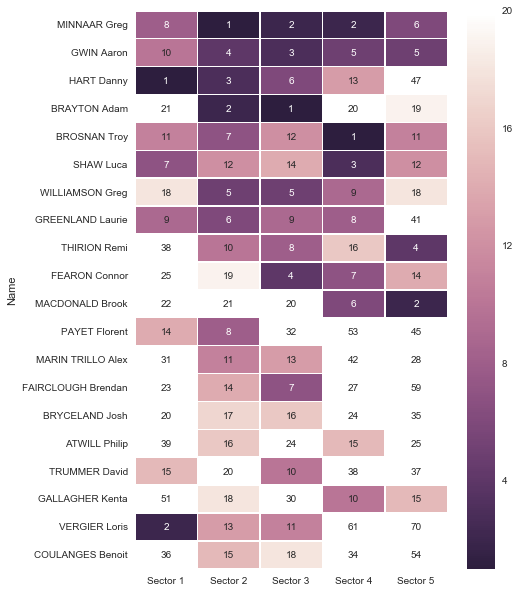

In [43]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, vmin=1, vmax=20, cmap=cmap)
heatmap.figure.savefig('fortwilliam_heatmap.png', bbox_inches='tight')

In [72]:
df2[['sector1','sector2','sector3','sector4','sector5', 'split5']][:5].T


,0,3,6,9,12
sector1,01:00.918,01:01.069,00:59.634,01:01.893,01:01.118
sector2,02:03.817,02:06.112,02:05.417,02:04.398,02:07.107
sector3,00:27.196,00:27.429,00:27.793,00:27.118,00:28.014
sector4,00:34.942,00:35.654,00:36.330,00:36.633,00:34.788
sector5,00:28.728,00:28.694,00:30.422,00:29.605,00:29.308
split5,04:35.601,04:38.958,04:39.596,04:39.647,04:40.335


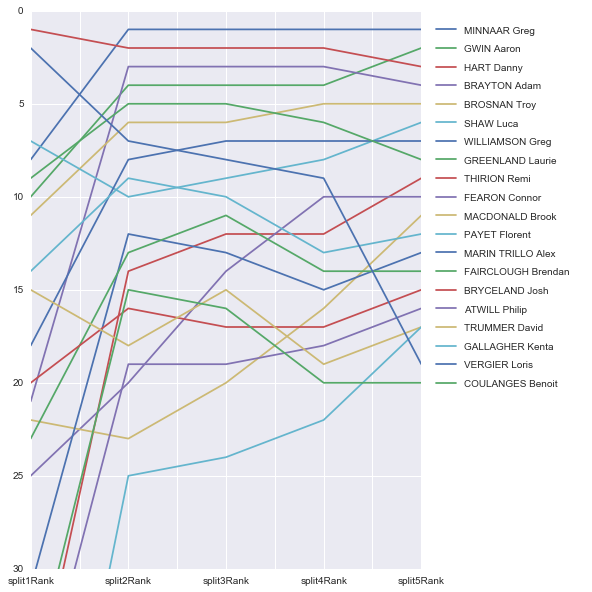

In [60]:
df_splittimes = df2[df2['split5Rank'] <= 20][['Name', 'split1Rank','split2Rank', 'split3Rank', 'split4Rank', 'split5Rank']]
df_splittimes = df_splittimes.set_index('Name')
df_splittimes = df_splittimes.T

sns.set_style("darkgrid")
df_splittimes.plot()
axes = plt.gca()
axes.set_ylim([0,30])
axes.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1), labelspacing=0.96, borderpad=1.5, loc=2, borderaxespad=0.)
plt.savefig('fortwilliam_positiontracker.png', bbox_inches='tight')

In [61]:
df_splits = df2[df2['split5Rank'] <= 20][['Name', 'split1','split2', 'split3', 'split4', 'split5']]
df_splits = df_splits.set_index('Name')
df_splits = df_splits.T

sns.set_style("darkgrid")
df_splits.plot()
axes = plt.gca()
axes.set_ylim([0,30])
axes.invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1), labelspacing=0.96, borderpad=1.5, loc=2, borderaxespad=0.)
plt.savefig('fortwilliam_positiontracker.png', bbox_inches='tight')

TypeError: Empty 'DataFrame': no numeric data to plot

In [69]:
cols = ['split1','split2','split3','split4','split5']

for col in cols:
    df2[col] = df2[col].apply(lambda x:parse_time(x))
df2.dtypes

ValueError: time data 'ays 00:05' does not match format '%S.%f'

In [40]:
df_splits = df2[['Name','sector1Gap','sector2Gap','sector3Gap','sector4Gap','sector5Gap']].sort_values("sector5Gap", ascending=True)
df_splits[:21]

,Name,sector1Gap,sector2Gap,sector3Gap,sector4Gap,sector5Gap
66,HANNAH Michael,3.421,8.502,1.162,1.819,0.000
30,MACDONALD Brook,2.266,6.491,1.147,0.870,0.778
69,MUDD Graeme,2.652,8.387,1.784,2.380,0.784
24,THIRION Remi,2.884,4.235,0.733,1.768,1.152
3,GWIN Aaron,1.435,2.295,0.311,0.866,1.258
0,MINNAAR Greg,1.284,0.000,0.078,0.154,1.292
144,LUKASIK Slawomir,2.303,14.097,2.022,2.951,1.441
75,MOIR Jack,3.317,8.218,1.400,1.772,1.561
63,SIMMONDS Matthew,1.546,7.425,2.102,1.908,1.632
138,RIESCO Forrest,5.708,9.898,2.062,2.618,1.773


In [42]:
groups = ['split1', 'split2', 'split3','split4','split5','sector1', 'sector2', 'sector3','sector4','sector5']

for group in groups:
    segment = df2[['Name', group + 'Rank', group, group + 'Gap']].sort_values(group + 'Rank', ascending=True)[:20]
    cols = ['Name', 'Position', 'Time', 'Gap']
    segment.columns = cols
    segment.to_json(group + '.json', orient='records')

In [59]:
df2[['Name','split5','split5Gap','split5Rank']].sort_values('split5')

,Name,split5,split5Gap,split5Rank
0,MINNAAR Greg,04:35.601,0.000,1
3,GWIN Aaron,04:38.958,3.357,2
6,HART Danny,04:39.596,3.995,3
9,BRAYTON Adam,04:39.647,4.046,4
12,BROSNAN Troy,04:40.335,4.734,5
15,SHAW Luca,04:41.687,6.086,6
18,WILLIAMSON Greg,04:41.788,6.187,7
21,GREENLAND Laurie,04:41.886,6.285,8
24,THIRION Remi,04:43.565,7.964,9
27,FEARON Connor,04:44.125,8.524,10
